In [56]:
from prophet import Prophet
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [33]:
data=pd.read_csv('AirtrafficA4.csv')[['YEAR','MONTH','PASSENGERS CARRIED']]
# data['ds']=pd.to_datetime(data[['YEAR','MONTH']].assign(DAY=1))
data['PASSENGERS CARRIED']=data['PASSENGERS CARRIED'].str.replace(',','').astype(float)

In [34]:
data.head()

,YEAR,MONTH,PASSENGERS CARRIED
0,2023,JAN,6847384.0
1,2023,FEB,6741948.0
2,2023,MAR,7317288.0
3,2023,APR,7406440.0
4,2023,MAY,8109626.0


In [35]:
data['PASSENGERS CARRIED']=(data['PASSENGERS CARRIED'].fillna(method='ffill')+data['PASSENGERS CARRIED'].fillna(method='bfill'))//2

/tmp/ipykernel_1605110/3506402013.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['PASSENGERS CARRIED']=(data['PASSENGERS CARRIED'].fillna(method='ffill')+data['PASSENGERS CARRIED'].fillna(method='bfill'))//2


In [22]:
data[data['YEAR']==2020]

,YEAR,MONTH,PASSENGERS CARRIED
32,2020,JAN,6119924.0
33,2020,FEB,5931189.0
34,2020,MAR,3793464.0
35,2020,APR,1967859.0
36,2020,MAY,142254.0
37,2020,JUNE,1046836.0
38,2020,JULY,1272240.0
39,2020,AUG,1681787.0
40,2020,SEP,2265539.0
41,2020,OCT,2926835.0


In [44]:
data['NUMERIC_MONTH'] = data['MONTH'].str.strip().map({
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUNE': 6, 'JULY': 7,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
})
data['DAY']=1
data['ds'] = pd.to_datetime(data[['YEAR', 'NUMERIC_MONTH', 'DAY']].rename(columns={
    'YEAR': 'year',
    'NUMERIC_MONTH': 'month',
    'DAY': 'day'
}))


In [46]:
data=data.sort_values('ds')

In [51]:
data_train=data[data['YEAR']<2023]
data_test=data[data['YEAR']>=2023]  

In [295]:
model=SARIMAX(data_train['PASSENGERS CARRIED'],order=(0,0,0),seasonal_order=(0,0,0,12))

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [296]:
model_fit=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66049D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   1.660D+01
  F =   16.604882370859144     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [297]:
predictions=model_fit.forecast(len(data_test))

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [207]:
mean_absolute_percentage_error(data_test['PASSENGERS CARRIED'],predictions)

np.float64(0.05741297988475417)

In [175]:
mean_absolute_error(data_test['PASSENGERS CARRIED'], predictions)

np.float64(283465.8057128992)

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros a

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46472D+01    |proj g|=  3.79891D-01

At iterate    5    f=  1.43856D+01    |proj g|=  1.84281D-02

At iterate   10    f=  1.43798D+01    |proj g|=  1.80027D-02

At iterate   15    f=  1.43759D+01    |proj g|=  2.49750D-02

At iterate   20    f=  1.43736D+01    |proj g|=  6.99761D-03

At iterate   25    f=  1.43734D+01    |proj g|=  5.32530D-03

At iterate   30    f=  1.43717D+01    |proj g|=  8.16981D-02

At iterate   35    f=  1.43700D+01    |proj g|=  4.28388D-02

At iterate   40    f=  1.43671D+01    |proj g|=  7.69558D-02

At iterate   45    f=  1.43661D+01    |proj g|=  4.70592D-02

At iterate   50    f=  1.43659D+01    |proj g|=  5.75478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the m

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46565D+01    |proj g|=  4.08224D-01

At iterate    5    f=  1.43832D+01    |proj g|=  2.06355D-02

At iterate   10    f=  1.43772D+01    |proj g|=  1.22902D-02

At iterate   15    f=  1.43755D+01    |proj g|=  4.95974D-03

At iterate   20    f=  1.43740D+01    |proj g|=  1.86767D-02

At iterate   25    f=  1.43727D+01    |proj g|=  4.94106D-03

At iterate   30    f=  1.43726D+01    |proj g|=  4.62655D-03

At iterate   35    f=  1.43715D+01    |proj g|=  3.91442D-02

At iterate   40    f=  1.43675D+01    |proj g|=  1.59260D-02

At iterate   45    f=  1.43658D+01    |proj g|=  3.26200D-02

At iterate   50    f=  1.43628D+01    |proj g|=  1.49153D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


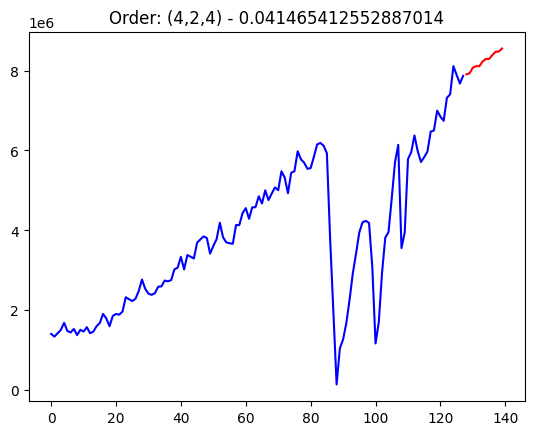

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros a

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46384D+01    |proj g|=  3.64734D-01

At iterate    5    f=  1.43875D+01    |proj g|=  1.74912D-02

At iterate   10    f=  1.43796D+01    |proj g|=  1.59967D-02

At iterate   15    f=  1.43751D+01    |proj g|=  2.91449D-02

At iterate   20    f=  1.43712D+01    |proj g|=  8.18235D-03

At iterate   25    f=  1.43708D+01    |proj g|=  4.47550D-03

At iterate   30    f=  1.43707D+01    |proj g|=  2.03599D-02

At iterate   35    f=  1.43706D+01    |proj g|=  8.33301D-04

At iterate   40    f=  1.43706D+01    |proj g|=  5.81007D-04

At iterate   45    f=  1.43706D+01    |proj g|=  1.97180D-02

At iterate   50    f=  1.43704D+01    |proj g|=  8.82740D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


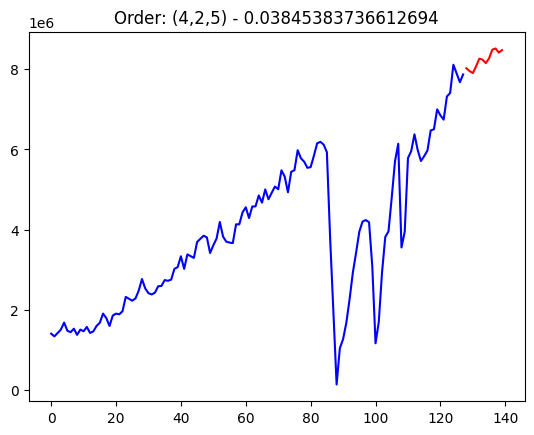

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros a

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46475D+01    |proj g|=  3.80316D-01

At iterate    5    f=  1.43874D+01    |proj g|=  2.04045D-02

At iterate   10    f=  1.43789D+01    |proj g|=  1.16569D-02

At iterate   15    f=  1.43727D+01    |proj g|=  8.22235D-02

At iterate   20    f=  1.43692D+01    |proj g|=  4.71472D-02

At iterate   25    f=  1.43677D+01    |proj g|=  1.05185D-02

At iterate   30    f=  1.43677D+01    |proj g|=  2.22202D-03

At iterate   35    f=  1.43677D+01    |proj g|=  1.55279D-03

At iterate   40    f=  1.43676D+01    |proj g|=  3.31177D-03

At iterate   45    f=  1.43676D+01    |proj g|=  1.06829D-02

At iterate   50    f=  1.43676D+01    |proj g|=  7.06230D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


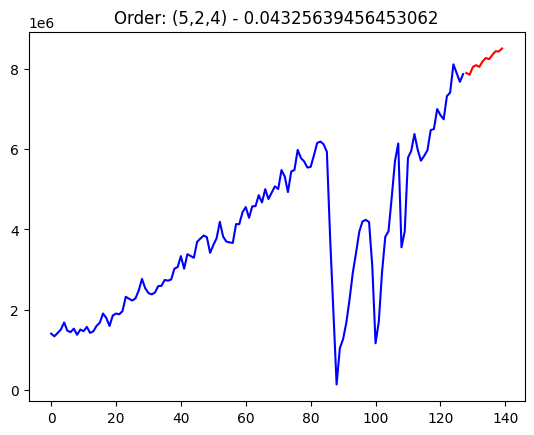

RUNNING THE L-BFGS-B CODE

           * * *



/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55273D+01    |proj g|=  3.01496D+00

At iterate    5    f=  1.44475D+01    |proj g|=  8.25837D-01

At iterate   10    f=  1.43810D+01    |proj g|=  1.08520D-01

At iterate   15    f=  1.43790D+01    |proj g|=  8.73157D-02

At iterate   20    f=  1.43787D+01    |proj g|=  1.73969D-02

At iterate   25    f=  1.43781D+01    |proj g|=  2.23275D-02

At iterate   30    f=  1.43753D+01    |proj g|=  1.04281D-01

At iterate   35    f=  1.43728D+01    |proj g|=  1.64410D-02

At iterate   40    f=  1.43703D+01    |proj g|=  9.15046D-02

At iterate   45    f=  1.43662D+01    |proj g|=  2.65999D-02

At iterate   50    f=  1.43597D+01    |proj g|=  1.11620D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates s

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the m

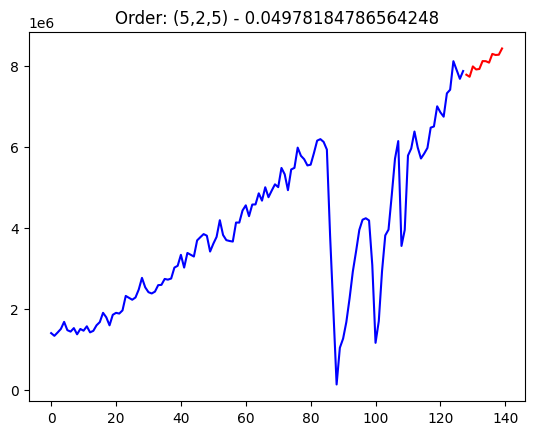

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros a

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46496D+01    |proj g|=  3.83748D-01

At iterate    5    f=  1.43876D+01    |proj g|=  4.24610D-02

At iterate   10    f=  1.43760D+01    |proj g|=  1.57013D-02

At iterate   15    f=  1.43661D+01    |proj g|=  1.06602D-01

At iterate   20    f=  1.43524D+01    |proj g|=  2.54580D-02

At iterate   25    f=  1.43507D+01    |proj g|=  1.26405D-02

At iterate   30    f=  1.43499D+01    |proj g|=  3.22213D-02

At iterate   35    f=  1.43497D+01    |proj g|=  5.90749D-04

At iterate   40    f=  1.43497D+01    |proj g|=  8.99396D-04

At iterate   45    f=  1.43497D+01    |proj g|=  4.31423D-03

At iterate   50    f=  1.43493D+01    |proj g|=  2.26625D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the m

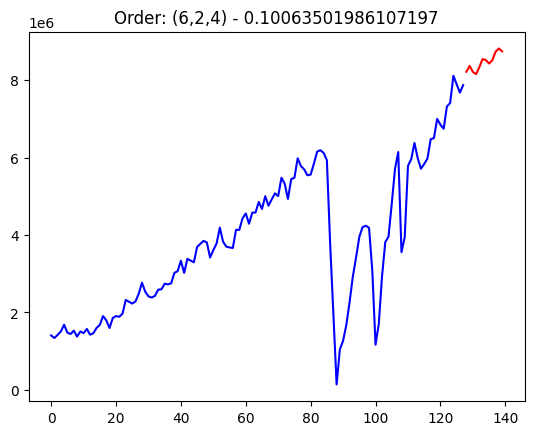

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros a

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46493D+01    |proj g|=  3.83361D-01

At iterate    5    f=  1.43880D+01    |proj g|=  5.61659D-02

At iterate   10    f=  1.43768D+01    |proj g|=  1.19329D-02

At iterate   15    f=  1.43713D+01    |proj g|=  1.23320D-01

At iterate   20    f=  1.43614D+01    |proj g|=  3.87916D-02

At iterate   25    f=  1.43557D+01    |proj g|=  1.80862D-02

At iterate   30    f=  1.43524D+01    |proj g|=  5.17103D-02

At iterate   35    f=  1.43476D+01    |proj g|=  1.79032D-02

At iterate   40    f=  1.43465D+01    |proj g|=  8.71235D-03

At iterate   45    f=  1.43456D+01    |proj g|=  2.40755D-02

At iterate   50    f=  1.43447D+01    |proj g|=  2.68952D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts c

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46600D+01    |proj g|=  4.13995D-01

At iterate    5    f=  1.43849D+01    |proj g|=  3.66526D-02

At iterate   10    f=  1.43715D+01    |proj g|=  3.25280D-02

At iterate   15    f=  1.43595D+01    |proj g|=  6.75223D-02

At iterate   20    f=  1.43541D+01    |proj g|=  2.51761D-02

At iterate   25    f=  1.43513D+01    |proj g|=  1.28154D-02

At iterate   30    f=  1.43498D+01    |proj g|=  3.04925D-02

At iterate   35    f=  1.43490D+01    |proj g|=  1.41000D-02

At iterate   40    f=  1.43487D+01    |proj g|=  6.18249D-02

At iterate   45    f=  1.43481D+01    |proj g|=  3.09467D-02

At iterate   50    f=  1.43478D+01    |proj g|=  1.48571D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates s

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


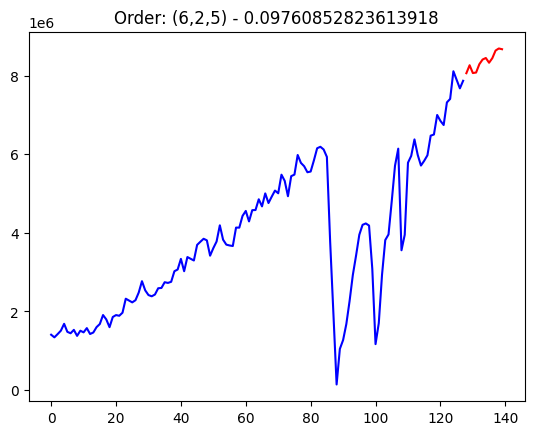

In [344]:
for i in range(4,7):
    for j in range(2,3):
        for k in range(4,6):
            preliminary_model=SARIMAX(data_train['PASSENGERS CARRIED'],order=(i,j,k))
            preliminary_model_fit=preliminary_model.fit()
            pred1=preliminary_model_fit.forecast(len(data_test))
            final_model=SARIMAX(data['PASSENGERS CARRIED'],order=(i,j,k))
            final_model_fit=final_model.fit()
            predictions=final_model_fit.forecast(12)
            plt.title(f'Order: ({i},{j},{k}) - {mean_absolute_percentage_error(data_test["PASSENGERS CARRIED"], pred1)}')
            plt.plot(range(len(data['ds'])), data['PASSENGERS CARRIED'], label='Actual Data', color='blue')
            plt.plot(range(len(data['ds']), len(data['ds']) + 12), predictions, label='Predictions', color='red')
            plt.show()

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [345]:
final_model=SARIMAX(data['PASSENGERS CARRIED'],order=(5,2,5))
final_model_fit=final_model.fit()
predictions=final_model_fit.forecast(12)
new_df=pd.DataFrame({'YEAR_MONTH':['2023 SEP', '2023 OCT', '2023 NOV', '2023 DEC', '2024 JAN', '2024 FEB', '2024 MAR', '2024 APR', '2024 MAY', '2024 JUN', '2024 JUL', '2024 AUG'],'PASSENGERS CARRIED':predictions})
new_df.to_csv('predictions.csv',index=False)
# 5,2,5 seems to be the best

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros a

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46551D+01    |proj g|=  4.05883D-01

At iterate    5    f=  1.43826D+01    |proj g|=  1.37894D-02

At iterate   10    f=  1.43670D+01    |proj g|=  3.18665D-02

At iterate   15    f=  1.43633D+01    |proj g|=  1.60804D-02

At iterate   20    f=  1.43615D+01    |proj g|=  4.84330D-03

At iterate   25    f=  1.43612D+01    |proj g|=  1.17371D-02

At iterate   30    f=  1.43610D+01    |proj g|=  7.03997D-03

At iterate   35    f=  1.43608D+01    |proj g|=  9.98125D-03

At iterate   40    f=  1.43607D+01    |proj g|=  8.54302D-03

At iterate   45    f=  1.43607D+01    |proj g|=  4.01866D-03

At iterate   50    f=  1.43607D+01    |proj g|=  2.36368D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [143]:
prophet_model=Prophet()

In [149]:
future_dates = pd.DataFrame({
    'ds': pd.date_range(start='2023-01-01', periods=8, freq='M')
})
prophet_forecast = prophet_model.predict(future_dates)

/tmp/ipykernel_1605110/4117733072.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ds': pd.date_range(start='2023-01-01', periods=8, freq='M')


In [99]:
mean_absolute_percentage_error(data_test['PASSENGERS CARRIED'],prophet_forecast['yhat'])

np.float64(0.2675037822239418)

In [100]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [101]:
etsModel=ETSModel(data_train['PASSENGERS CARRIED'],error='add',trend='add',seasonal='add',seasonal_periods=12)

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [106]:
ets_fit=etsModel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54025D+01    |proj g|=  8.99900D-01

At iterate    1    f=  1.46819D+01    |proj g|=  1.72307D-05

At iterate    2    f=  1.46819D+01    |proj g|=  1.77686D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16      2     12      4     0     2   1.777D-07   1.468D+01
  F =   14.681887137430842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [107]:
mean_absolute_percentage_error(data_test['PASSENGERS CARRIED'],ets_fit.forecast(len(data_test)))

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


np.float64(0.06716537858929009)

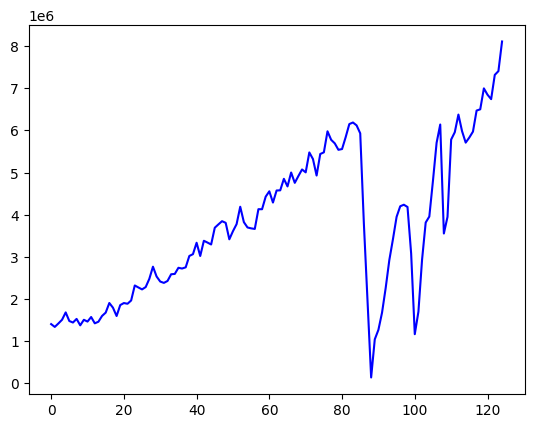

In [198]:
shift=3
plt.plot(range(len(data['ds'])-shift), data['PASSENGERS CARRIED'].iloc[:-shift], label='Actual Data', color='blue')
# plt.plot(range(len(data['ds']), len(data['ds']) + 12), predictions, label='Predictions', color='red')
# plt.plot(range(len(data['ds']), len(data['ds']) + 8), prophet_forecast['yhat'], label='Prophet Preds', color='orange')

In [202]:
predictions

125    8.275242e+06
126    8.277392e+06
127    8.358509e+06
128    8.443112e+06
129    8.594556e+06
130    8.658482e+06
131    8.809474e+06
132    8.839933e+06
133    8.878715e+06
134    9.044389e+06
135    9.119441e+06
136    9.308945e+06
Name: predicted_mean, dtype: float64

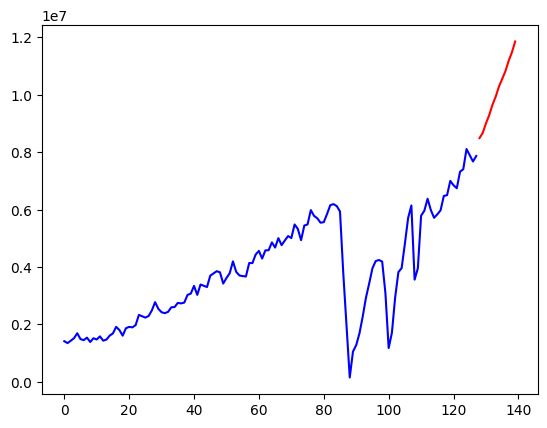

In [233]:
plt.plot(range(len(data['ds'])), data['PASSENGERS CARRIED'], label='Actual Data', color='blue')
plt.plot(range(len(data['ds']), len(data['ds']) + 12), predictions, label='Predictions', color='red')

# plt.plot(range(len(data['ds']), len(data['ds']) + 8), prophet_forecast['yhat'], label='Prophet Preds', color='orange')

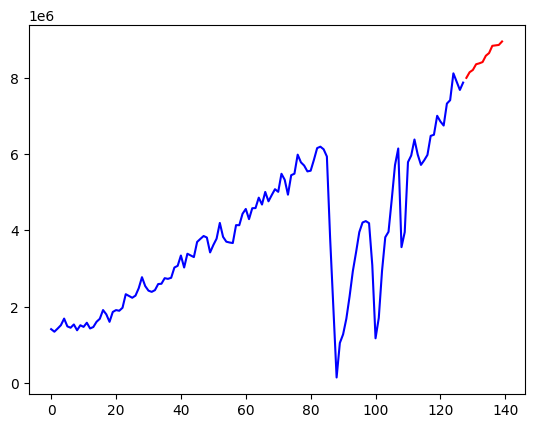

In [212]:
plt.plot(range(len(data['ds'])), data['PASSENGERS CARRIED'], label='Actual Data', color='blue')
plt.plot(range(len(data['ds']), len(data['ds']) + 12), predictions, label='Predictions', color='red')
# plt.plot(range(len(data['ds']), len(data['ds']) + 8), prophet_forecast['yhat'], label='Prophet Preds', color='orange')

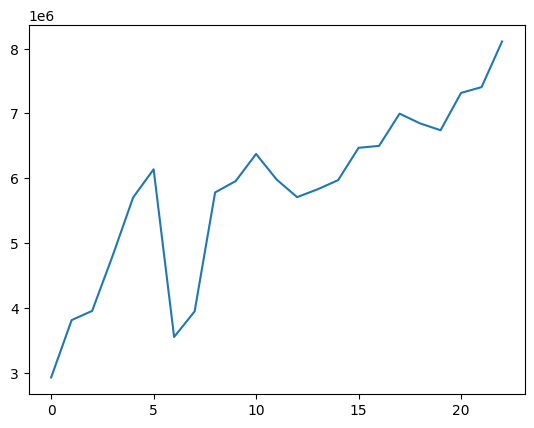

In [227]:
start, stop=-26, -3
plt.plot(range(len(data['ds'].iloc[start:stop])), data['PASSENGERS CARRIED'].iloc[start:stop])

In [234]:
predictions

23    8.491416e+06
24    8.672203e+06
25    9.006432e+06
26    9.294508e+06
27    9.652008e+06
28    9.937884e+06
29    1.028932e+07
30    1.055471e+07
31    1.082705e+07
32    1.118681e+07
33    1.148401e+07
34    1.186044e+07
Name: predicted_mean, dtype: float64